<a href="https://colab.research.google.com/github/muthonioprah/Supermarket-Data/blob/main/Moringa_Data_Science_Prep_W5_joint_Project_2021_11_Data_Den_PythonProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **INTRODUCTION**
1. Defining the question

Many supermarkets are facing challenges in their day to day business. This is brought about by many factors including; lack of strategies, management issues,  misunderstanding betwwen them and the the target custoners and rivarly with online shops.We have been called in by different supermarkets so as to learn more about Nairobi shoppers from their consumer behaviours based on parameters such as location, time, day where they shop and what they buy. And how this would inform business decisions.

2. Defining the Metric for Success

In order to do our analysis, we are required us to answer some questions concerning customer purchase behaviour within different supermarkets arouns Nairobi county. In doing so we will be able to come up with appropriate solutions to give different supermarkets for them to equip themeselves better

3. Understanding the context


Our dataset contains a list of Kenyan retail Supermarkets containing information on items, location, day, type of payments among other variables. Historically, supermarkets have their business models radically re-shaped by cashless payment instore, online (advertisement, payments, locations) and in the food industry supply chain.

The lack of or derailment in implementation of crucial strategies have led to the closure of major supermarkets across Kenya. These technologies will be deployed in the battle for customers but, more than this, can also benefit the business as a whole. 



4.  Recording the Experimental Design


Below are the steps i took to implement this solution

a) Business Understanding: This sheds light to the context of the business question that we
are trying to answer hence keep the focus during the data analysis so that we meet the
intended objective.

b) Reading the data: Reading our data with and aim to understand the variables and
observations.

c) Checking our data: This to get details about the dataset, the number of records, the
statistal summary,the datatypes in our dataset among others.

d) Data cleaning, I performed all my data cleaning and preparation to make my data ready
for analysis.
The dataset we will be using is in the link below

https://moringaclassroom.slack.com/archives/C02MSHSF1KQ/p1637819494021700

e) EDA, the data was analysed and visualized.

f) Implementing the solution using Linear discriminant analaysis and CPA

g) Challenged the solution.

h)Conclusion

5.  Data Relevance

The data source was from different supermarkets within Nairobi county. The data was conducted a while ago but is still relevant in our research.


#1. DATA UNDERSTANDING

In [3]:
# Importing the libraries we will need 

# Importing the pandas library
# 
import pandas as pd

# Importing the numpy library
#
import numpy as np

In [4]:
#to read the data in the csv file to create a dataframe
#the dataframe will be referred to as 'df'
df= pd.read_csv('/content/supermarketdata.csv')
df
#to display the top 5 records of the dataframe
df.head(5)

,supermarket,no_of_items,variation,total,paid,change,type,food,snack,beverage,consumables,high_end,asset,fixed_asset,date,mall,time,time_type,type_market,location,loc_category,day,day_type,24hr,day.1,month,year
0,acacia,1,1,90.0,100,10.0,cash,yes,no,no,no,no,no,no,20/05/2017,no,19:33,night,small,saika,mid,saturday,weekend,no,20,5,2017.0
1,acacia,1,1,90.0,500,410.0,cash,yes,no,no,no,no,no,no,20/05/2017,no,19:12,night,small,saika,mid,saturday,weekend,no,20,5,2017.0
2,acacia,3,1,270.0,300,30.0,cash,yes,no,no,no,no,no,no,20/05/2017,no,19:16,night,small,saika,mid,saturday,weekend,no,20,5,2017.0
3,acacia,3,1,137.0,200,63.0,cash,yes,no,no,no,no,no,no,20/05/2017,no,19:12,night,small,saika,mid,saturday,weekend,no,20,5,2017.0
4,acacia,1,1,75.0,80,5.0,cash,yes,no,no,no,no,no,no,20/05/2017,no,18:31,afternoon,small,saika,mid,saturday,weekend,no,20,5,2017.0


In [5]:
#getting information on the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1464 entries, 0 to 1463
Data columns (total 27 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   supermarket   1463 non-null   object 
 1   no_of_items   1464 non-null   int64  
 2   variation     1464 non-null   int64  
 3   total         1464 non-null   float64
 4   paid          1464 non-null   int64  
 5   change        1464 non-null   float64
 6   type          1464 non-null   object 
 7   food          1464 non-null   object 
 8   snack         1464 non-null   object 
 9   beverage      1464 non-null   object 
 10  consumables   1464 non-null   object 
 11  high_end      1464 non-null   object 
 12  asset         1464 non-null   object 
 13  fixed_asset   1464 non-null   object 
 14  date          1464 non-null   object 
 15  mall          1464 non-null   object 
 16  time          1464 non-null   object 
 17  time_type     1464 non-null   object 
 18  type_market   1464 non-null 

In [6]:
#to get the number of rows and columns respectively
df.shape

(1464, 27)

********************************************************************************************************

# Creating a file for the description of our dataset

In [7]:
#we create a new dataframe for the description of our dataset
#
description_list= [['supermarket', "Name of supermarket"],
            ['no _of_time', "Number of items bought"],
            ['variation', "Quantity of product(s) bought .Example: two bottles of water"],
            ['total', "Total amount of the product(s) cost"],
            ['paid', "Total amount paid by a customer"],
            ['change', "Total change that was returned to a customer"],
            ['type', "Method of payment by a customer"],
            ['food', "Whether the product(s) were food related(yes or no)"],
            ['beverage', "Whether the product(s) were beverages(yes or no)"],
            ['snacks', "whether the product(s) were snacks(yes or no)"],
            ['consumable', "Whether the product(s) can be consumed by a customer(yes or no)"],
            ['high_end', "Whether the product(s) are of high value and luxurious type(yes or no)"],
            ['asset', "A useful commodity to a customer(yes or no)"],
            ['fixed assets', "​​Assets which are purchased for long-term use and are not likely to be converted quickly into cash, such as land, buildings, and equipment.(yes or no)"],
            ['date', "Date the customer bought a product"],
            ['mall', "Whether it's a mall or not(yes or no)"],
            ['time', "Specific time a purchase was made"],
            ['time_type', "Time of day a purchase was made"],
            ['type_market', "Type of supermarket"],
            ['location', "Location of the supermarket"],
            ['loc_category', "Category of the location"],
            ['day_type', "Whether it's a weekend or weekday "],
            ['24hr', "Whether its a supermarket that operates for 24 hours(yes or no)"],
            ['day', "Which day of the month the purchase was made"],
            ['month', "Month the purchase was made"],
            ['year', "Year the purchase was made"]]
df1 = pd.DataFrame(description_list, columns = ['Name', 'Meaning_of_name'])
df1


,Name,Meaning_of_name
0,supermarket,Name of supermarket
1,no _of_time,Number of items bought
2,variation,Quantity of product(s) bought .Example: two bo...
3,total,Total amount of the product(s) cost
4,paid,Total amount paid by a customer
5,change,Total change that was returned to a customer
6,type,Method of payment by a customer
7,food,Whether the product(s) were food related(yes o...
8,beverage,Whether the product(s) were beverages(yes or no)
9,snacks,whether the product(s) were snacks(yes or no)


In [8]:
#we converted the dataframe to csv
#
df1.to_csv("Supermarket_description")

In [9]:
#we read our new dataframe
#
df.to_csv("Supermarket_description_1.csv",index = False, header = True)

#2. DATA CLEANING
Cleaning and transforming the raw data prior to processing and analysis


In [10]:
#to check sum of null values in the DataFrame
df.isnull().sum().sum()

3

In [11]:
#we drop rows with duplicates since they are not needed 
#
df = df.drop_duplicates()

In [12]:
#we check for null values
#
df.isnull().sum().sum()

3

In [13]:
#rows with null values were dropped since non they were only 3 rows which were irrelevant
df = df.dropna()

In [14]:
df.isnull().sum().sum()

0

In [15]:
#to review the cleaned dataframe
df.head()

,supermarket,no_of_items,variation,total,paid,change,type,food,snack,beverage,consumables,high_end,asset,fixed_asset,date,mall,time,time_type,type_market,location,loc_category,day,day_type,24hr,day.1,month,year
0,acacia,1,1,90.0,100,10.0,cash,yes,no,no,no,no,no,no,20/05/2017,no,19:33,night,small,saika,mid,saturday,weekend,no,20,5,2017.0
1,acacia,1,1,90.0,500,410.0,cash,yes,no,no,no,no,no,no,20/05/2017,no,19:12,night,small,saika,mid,saturday,weekend,no,20,5,2017.0
2,acacia,3,1,270.0,300,30.0,cash,yes,no,no,no,no,no,no,20/05/2017,no,19:16,night,small,saika,mid,saturday,weekend,no,20,5,2017.0
3,acacia,3,1,137.0,200,63.0,cash,yes,no,no,no,no,no,no,20/05/2017,no,19:12,night,small,saika,mid,saturday,weekend,no,20,5,2017.0
4,acacia,1,1,75.0,80,5.0,cash,yes,no,no,no,no,no,no,20/05/2017,no,18:31,afternoon,small,saika,mid,saturday,weekend,no,20,5,2017.0


In [16]:
#First to change the dtype date and time column from 
df['date'] = df['date'].astype(str)
df['time'] = df['time'].astype(str)


#combining the  day, month and year column to form a date column
df['Date_Time'] = df[['date', 'time']].agg(' '.join, axis=1)
df.head(10)

,supermarket,no_of_items,variation,total,paid,change,type,food,snack,beverage,consumables,high_end,asset,fixed_asset,date,mall,time,time_type,type_market,location,loc_category,day,day_type,24hr,day.1,month,year,Date_Time
0,acacia,1,1,90.0,100,10.0,cash,yes,no,no,no,no,no,no,20/05/2017,no,19:33,night,small,saika,mid,saturday,weekend,no,20,5,2017.0,20/05/2017 19:33
1,acacia,1,1,90.0,500,410.0,cash,yes,no,no,no,no,no,no,20/05/2017,no,19:12,night,small,saika,mid,saturday,weekend,no,20,5,2017.0,20/05/2017 19:12
2,acacia,3,1,270.0,300,30.0,cash,yes,no,no,no,no,no,no,20/05/2017,no,19:16,night,small,saika,mid,saturday,weekend,no,20,5,2017.0,20/05/2017 19:16
3,acacia,3,1,137.0,200,63.0,cash,yes,no,no,no,no,no,no,20/05/2017,no,19:12,night,small,saika,mid,saturday,weekend,no,20,5,2017.0,20/05/2017 19:12
4,acacia,1,1,75.0,80,5.0,cash,yes,no,no,no,no,no,no,20/05/2017,no,18:31,afternoon,small,saika,mid,saturday,weekend,no,20,5,2017.0,20/05/2017 18:31
5,nakumatt,22,3,5611.0,5611,0.0,card,yes,no,no,yes,yes,no,no,24/12/2016,no,16:26,afternoon,chain,cbd,mid,wednesday,weekday,yes,24,12,2016.0,24/12/2016 16:26
6,acacia,1,1,55.0,100,45.0,cash,yes,no,no,no,no,no,no,20/05/2017,no,18:23,afternoon,small,saika,mid,saturday,weekend,no,20,5,2017.0,20/05/2017 18:23
7,chandarana,32,3,7955.0,7955,0.0,mpesa,yes,no,no,yes,yes,no,no,03/01/2017,yes,19:03,night,median,yaya,high,tuesday,weekday,no,3,1,2017.0,03/01/2017 19:03
8,nakumatt,1,1,780.0,1000,220.0,cash,no,no,no,yes,no,no,no,27/03/2017,yes,19:34,night,chain,kilimani,high,monday,weekday,no,27,3,2017.0,27/03/2017 19:34
9,acacia,1,1,235.0,500,265.0,cash,no,no,no,yes,no,no,no,15/05/2017,no,14:06,afternoon,small,saika,mid,monday,weekday,no,15,5,2017.0,15/05/2017 14:06


In [17]:
##To drop the separate date and time columns
#then we preview the first 5 rows
#
df_cleaned = df.drop(['date', 'time'], axis = 1)
df_cleaned.head(5)

,supermarket,no_of_items,variation,total,paid,change,type,food,snack,beverage,consumables,high_end,asset,fixed_asset,mall,time_type,type_market,location,loc_category,day,day_type,24hr,day.1,month,year,Date_Time
0,acacia,1,1,90.0,100,10.0,cash,yes,no,no,no,no,no,no,no,night,small,saika,mid,saturday,weekend,no,20,5,2017.0,20/05/2017 19:33
1,acacia,1,1,90.0,500,410.0,cash,yes,no,no,no,no,no,no,no,night,small,saika,mid,saturday,weekend,no,20,5,2017.0,20/05/2017 19:12
2,acacia,3,1,270.0,300,30.0,cash,yes,no,no,no,no,no,no,no,night,small,saika,mid,saturday,weekend,no,20,5,2017.0,20/05/2017 19:16
3,acacia,3,1,137.0,200,63.0,cash,yes,no,no,no,no,no,no,no,night,small,saika,mid,saturday,weekend,no,20,5,2017.0,20/05/2017 19:12
4,acacia,1,1,75.0,80,5.0,cash,yes,no,no,no,no,no,no,no,afternoon,small,saika,mid,saturday,weekend,no,20,5,2017.0,20/05/2017 18:31


# Exporting our cleaned dataset

In [18]:
#We export our cleaned dataset into a csv file
#
df_cleaned.to_csv('Supermarket1_new.csv')

In [19]:
#reading our new dataset and viewing the first 5 rows

df_cleaned =pd.read_csv("Supermarket1_new.csv")
df_cleaned.tail(5)

,Unnamed: 0,supermarket,no_of_items,variation,total,paid,change,type,food,snack,beverage,consumables,high_end,asset,fixed_asset,mall,time_type,type_market,location,loc_category,day,day_type,24hr,day.1,month,year,Date_Time
1433,1459,tuskys,4,3,1810.0,2000,190.0,cash,no,yes,no,yes,yes,no,no,yes,morning,chain,greenspan,mid,Thursday,weekday,no,15,6,2017.0,15/06/2017 11:28
1434,1460,nakumatt,2,3,516.0,516,0.0,card,yes,no,yes,no,yes,no,no,yes,night,chain,junction,mid,Monday,weekday,no,17,7,2017.0,17/07/2017 21:00
1435,1461,tuskys,2,1,290.0,500,210.0,cash,yes,no,no,no,no,no,no,no,night,chain,cbd,mid,Sunday,weekend,no,30,6,2017.0,30/06/2017 21:09
1436,1462,tuskys,5,2,596.0,1000,404.0,cash,yes,no,no,yes,no,no,no,yes,morning,chain,greenspan,mid,Monday,weekday,no,8,5,2017.0,08/05/2017 11:00
1437,1463,Eastmatt,2,2,120.0,2000,1880.0,cash,yes,yes,no,no,no,no,no,no,evening,chain,cbd,mid,Friday,weekday,no,23,6,2017.0,23/06/2017 16:51


#**DATA ANALYSIS**
The data is inspected, transformed, and modelled with the goal of discovering useful information, informing conclusions and supporting decision-making

In [20]:
#displaying all the different supermarkets
df_cleaned['supermarket'].unique()

array(['acacia', 'nakumatt', 'chandarana', 'tuskys', 'uchumi', 'naivas',
       'kamindi', 'karrymart', 'ukwala', 'neema', 'eastmatt', 'kassmart',
       'fairway', 'tumaini', 'cleanshelf', 'large neema', 'interstrat',
       'zucchini', 'magna', 'Tuskys', 'Naivas', 'Selfridges', 'Eastmatt',
       'foodplus'], dtype=object)

In [21]:
#checking the supermarket records
print(df_cleaned['supermarket'].describe())

count          1438
unique           24
top       karrymart
freq            515
Name: supermarket, dtype: object


In [22]:
#checking how many times each supermarket appears in the dataset
df_cleaned['supermarket'].value_counts()

karrymart      515
tumaini        268
nakumatt       175
cleanshelf     124
tuskys         122
ukwala          52
acacia          51
naivas          30
eastmatt        26
Tuskys          16
Naivas          15
chandarana      12
uchumi          10
zucchini         4
neema            4
kamindi          3
Eastmatt         2
Selfridges       2
fairway          2
kassmart         1
large neema      1
foodplus         1
interstrat       1
magna            1
Name: supermarket, dtype: int64

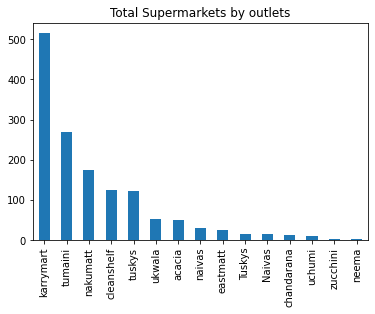

In [23]:
#Visual of the supermarkets and their frequency
#importing visualisation library
import seaborn as sns
df_cleaned['supermarket'].value_counts().head(15).plot(kind ="bar",title ="Total Supermarkets by outlets");

In [24]:
print("The most popular supermarket is: ")
#used this method since 'supermarket' column is a string
#To find out which supermarket has the most frequency
df_cleaned['supermarket'].value_counts(). idxmax()

The most popular supermarket is: 


'karrymart'

#a. **Do shoppers spend more on a weekday at a supermarket retail chain outside a mall?**


In [25]:
#on weekdays
weekday = (df_cleaned['day_type'] == 'weekday')
#on weekends condition
weekend = (df_cleaned['day_type'] == 'weekend')

In [26]:
#narrow down to mall data
mall = (df_cleaned['mall'] == 'yes')
#supermarkets not in malls
no_mall = (df_cleaned['mall'] == 'no')

In [27]:
#finding the total sales for supermarkets in malls on weekdays
wd_sales = df_cleaned[weekday & mall]
wd_sales['total'].sum()

121565.70999999999

In [28]:
#finding the total sales for supermarkets outside malls on weekdays

wkdy_sales = df_cleaned[weekday & no_mall]
wkdy_sales['total'].sum()

235934.9

In [29]:
#finding the total sales for supermarkets in malls on weekends

wknd_sales = df_cleaned[weekend & mall]
wknd_sales['total'].sum()

7117.0

In [30]:
#finding the total sales for supermarkets outside malls on weekends

wknd = df_cleaned[weekend & no_mall]
wknd['total'].sum()

81058.0

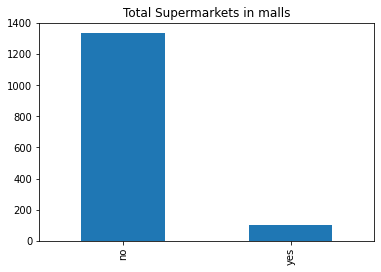

In [31]:
#visual of the supermarkets in malls
df_cleaned['mall'].value_counts().head(15).plot(kind ="bar",title ="Total Supermarkets in malls");

**Supermarkets that were outside malls made more sales on weekdays and weekends as well**
**There were more supermarkets situated outside malls as compared to those in malls**

***************************************************

#b.**Did consumers prefer chain, medium or small stores?**


In [32]:
#viewing the type of supermarkets and how often they appear
#counting the number of values in the type_market column
df_cleaned['type_market'].value_counts()


chain     1274
small      127
median      37
Name: type_market, dtype: int64

In [33]:
#total sales for the chain supermarkets
types = df_cleaned.groupby('type_market')
chain = types.get_group('chain')
chain['total'].sum()

405465.61

In [34]:
#total sales for the median supermarkets
median = types.get_group('median')
median['total'].sum()

13397.0

In [35]:
#total sales for the small supermarkets
small = types.get_group('small')
small['total'].sum()

26813.0

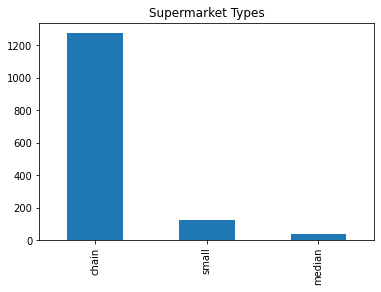

In [36]:
df_cleaned['type_market'].value_counts().head(15).plot(kind ="bar",title ="Supermarket Types");

##### **Customer prefered purchasing items from chain stores as compared to median and smaller stores**
##### **Chain Supermarkets are the most common supermarket type in Kenya**
***************************************************


#c. *Which was the most common mode of payment?*

In [37]:
#counting the most common mode of payment 
df_cleaned['type'].value_counts()

cash               1354
mpesa                51
card                 26
credit card           3
voucher               2
redeemed points       1
points                1
Name: type, dtype: int64

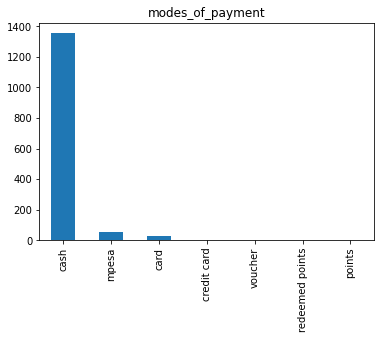

In [38]:
#visual of the payment modes
df_cleaned['type'].value_counts().head(15).plot(kind ="bar",title ="modes_of_payment");

####**Customers preferred paying for items using cash as compared to other payment methods**

***************************************************


#d. **Which category of items were less/more purchased in mid/high income areas?**

In [39]:
#grouping by location category
area_type = df_cleaned.groupby('loc_category')
high = area_type.get_group('high')
consumables = (df_cleaned['consumables']=='yes')
#counting the number of times consumables were purchased in high income areas
high[consumables].count()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


Unnamed: 0      9
supermarket     9
no_of_items     9
variation       9
total           9
paid            9
change          9
type            9
food            9
snack           9
beverage        9
consumables     9
high_end        9
asset           9
fixed_asset     9
mall            9
time_type       9
type_market     9
location        9
loc_category    9
day             9
day_type        9
24hr            9
day.1           9
month           9
year            9
Date_Time       9
dtype: int64

In [40]:
#counting the number of times consumables were purchased in mid income areas
mid = area_type.get_group('mid')
mid[consumables].count()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until


Unnamed: 0      302
supermarket     302
no_of_items     302
variation       302
total           302
paid            302
change          302
type            302
food            302
snack           302
beverage        302
consumables     302
high_end        302
asset           302
fixed_asset     302
mall            302
time_type       302
type_market     302
location        302
loc_category    302
day             302
day_type        302
24hr            302
day.1           302
month           302
year            302
Date_Time       302
dtype: int64


#####**Customers from mid income areas purchase more consumable goods as compared to those from high income areas**

***************************************************







In [41]:
#counting the number of times assets were purchased in mid income areas
assets = (df_cleaned['asset']=='yes')
mid[assets].count()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until


Unnamed: 0      123
supermarket     123
no_of_items     123
variation       123
total           123
paid            123
change          123
type            123
food            123
snack           123
beverage        123
consumables     123
high_end        123
asset           123
fixed_asset     123
mall            123
time_type       123
type_market     123
location        123
loc_category    123
day             123
day_type        123
24hr            123
day.1           123
month           123
year            123
Date_Time       123
dtype: int64

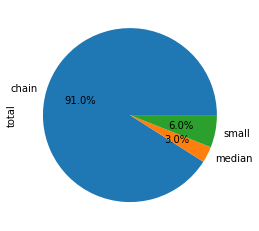

In [42]:
# Create the default pairplot
df_total=df.groupby("type_market")["total"].sum()
df_total
df_total.plot.pie(autopct="%.1f%%");

In [43]:
#counting the number of times assets were purchased in high income areas
high[assets].count()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


Unnamed: 0      14
supermarket     14
no_of_items     14
variation       14
total           14
paid            14
change          14
type            14
food            14
snack           14
beverage        14
consumables     14
high_end        14
asset           14
fixed_asset     14
mall            14
time_type       14
type_market     14
location        14
loc_category    14
day             14
day_type        14
24hr            14
day.1           14
month           14
year            14
Date_Time       14
dtype: int64

#####**Customers from mid income areas purchase assets more as compared to high income areas**
****************************************************

In [44]:
#counting the number of times fixed_assets were purchased in high income areas
fixed_asset = (df_cleaned['fixed_asset']=='yes')
high[fixed_asset].count

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until


<bound method DataFrame.count of      Unnamed: 0 supermarket  no_of_items  ...  month    year         Date_Time
222         222    nakumatt            6  ...      6  2017.0  06/06/2017 10:45

[1 rows x 27 columns]>

In [45]:
#counting the number of times fixed_assets were purchased in mid income areas
mid[fixed_asset].count

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


<bound method DataFrame.count of      Unnamed: 0 supermarket  no_of_items  ...  month    year         Date_Time
101         101    nakumatt            6  ...      3  2017.0  10/03/2017 16:30
150         150      tuskys            2  ...      6  2017.0  02/06/2017 18:22

[2 rows x 27 columns]>

**Customers from Mid income areas purchased more fixed assets as compared to high income areas**

***************************************************


******************************************************************************************************

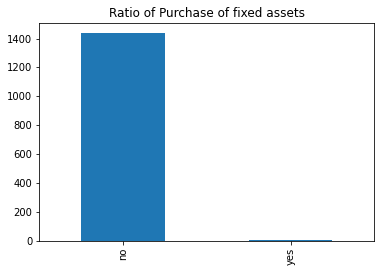

In [46]:
#visual of the fixed assets sales
df_cleaned['fixed_asset'].value_counts().head(15).plot(kind ="bar",title ="Ratio of Purchase of fixed assets");

#e. **Did the chain stores that operated 24 hours have more sales?**

In [47]:
#classify the stores by the time periods they operate
time = df_cleaned.groupby('24hr')
#chosingg those that operate for 24hrs
two4seven = time.get_group('yes')
#finding the sum of the sales column
two4seven['total'].sum()

36810.0

In [48]:
#chosing those that don't operate for 24hrs
day_time = time.get_group('no')
#finding the sum of the sales column
day_time['total'].sum()

408865.61

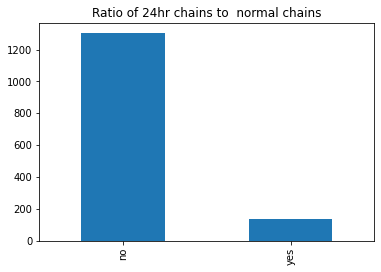

In [49]:
#a visual of the number of the stores that operate 24hrs and those that don't
df_cleaned['24hr'].value_counts().head(15).plot(kind ="bar",title ="Ratio of 24hr chains to  normal chains");

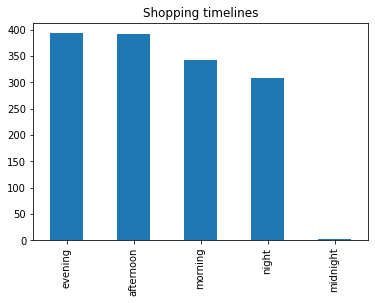

In [50]:
#visual of the shopping timelines
df_cleaned['time_type'].value_counts().head(15).plot(kind ="bar",title ="Shopping timelines");

******************************************************************************************************

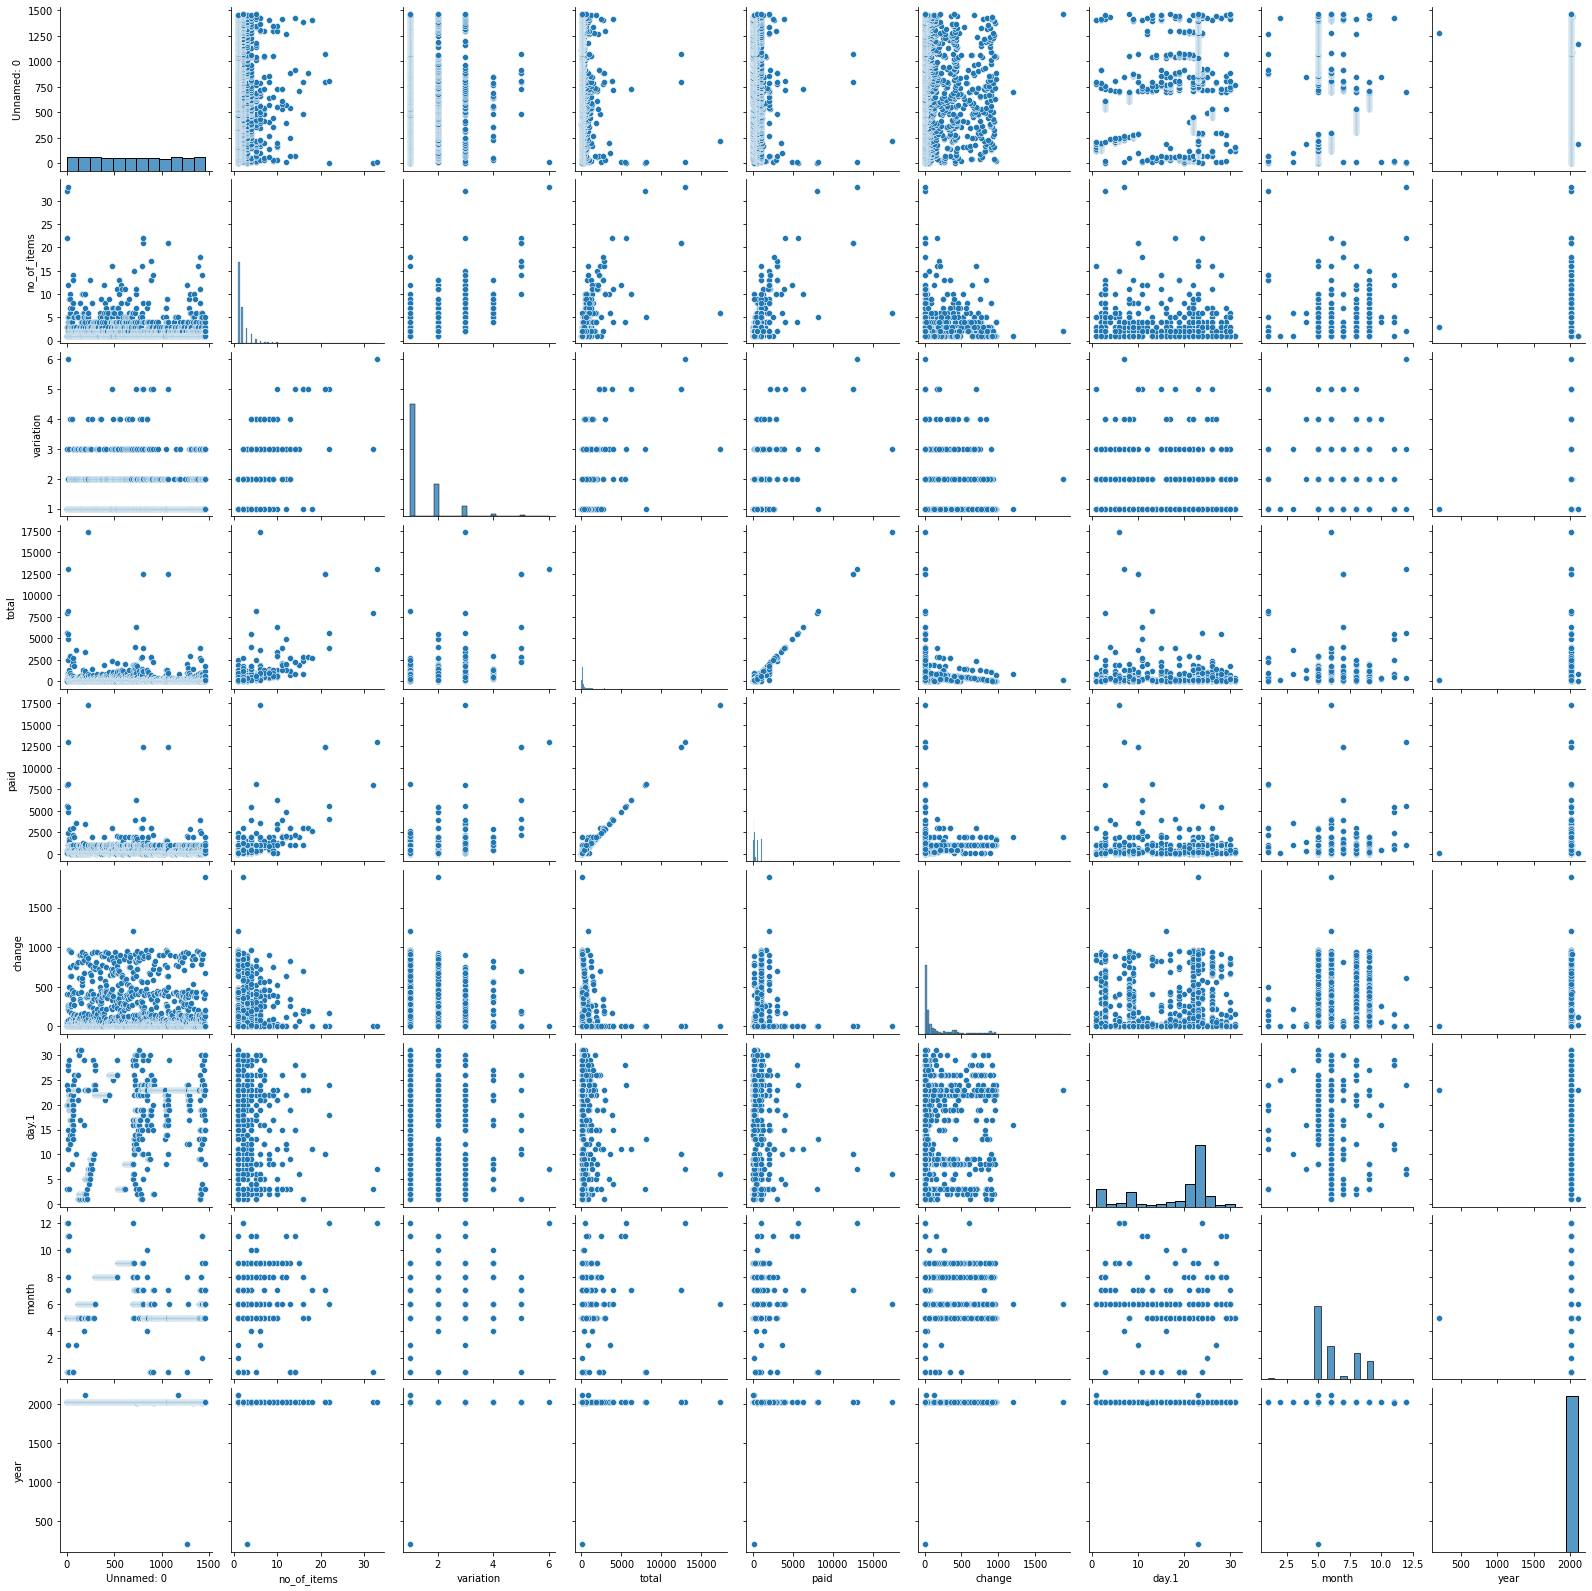

In [51]:
#the default pairplot
sns.pairplot(df_cleaned)



#####**Stores that only operated during the day only had more sales compared to those that operated for 24hrs**
#####**Customers had a tendancy to shop more during the evening and during the day as compared to hopping at night**
**************************************************




#FINDINGS AND RECOMMENDATIONS
1. Supermarkets that were outside malls made more sales on weekdays and weekends as well

**Recommendation**: Supermarkets in malls should do more to attract more customers

2. Customer prefered purchasing items from chain stores as compared to median and smaller stores

**Reccommendations**: Chain stores should set up more supermarkets to reach a larger market

3. Customers preferred paying for items using cash as compared to other payment methods

**Reccommendations**: Supermarkets should have more lose change to give customers to ensure easy transaction process

4. Customers from mid income areas purchase more consumable goods as compared to those from high income areas

**Reccommendations**: Supermarkets in mid income areas should stock more consumerable goods to satisfy all their consumers' needs

5. Customers from mid income areas purchase assets more as compared to high income areas

**Reccommendations**: Supermarkets in high income areas should stock more asset goods to satisfy all their consumers' needs

6. Customers from Mid income areas purchased more fixed assets as compared to high income areas

**Reccommendations**: Supermarkets in high income areas should stock more fixed asset goods to satisfy all their consumers' needs

7. Stores that only operated during the day only had more sales compared to those that operated for 24hrs

**Reccommendations**: Supermarkets should focus more on keeping the stores open and operational during the day because that is when most customers tend to buy goods.